In [1]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

In [2]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import scipy.signal as signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact

## Terhelési probléma

Amikor egy rendszer egy blokkdiagrammal reprezentált, az alap elképzelés, hogy a bemenet befolyásolja a kimenetet. A kimenet felhasználható a következő blokk bemeneteként. Feltételezett viszont, hogy amikor egy új blokk kapcsolódik, semmi sem változik a korábbi részeken. Egyes esetekben viszont ez az feltételezés nem igaz, amire általában »Terhelési probléma«-ként hivatkoznak. Példaképp az alábbi két rendszert vizsgáljuk.

<table>
    <tr>
        <th style="text-align:center">A terhelési probléma vázlata</th>
    </tr>
    <tr>
        <td style><img src='img/loading_problem.png'></td>
    </tr>
    <tr>
    </tr>    
</table>

Irányításelméleti szemszögből mindegyik rész külön vizsgálható, és átviteli függvényeik $P_1(s)$ és $P_2(s)$ kiszámíthatóak. Ha a blokkok össze vannak kötve, akkor úgy gondolhatjuk, hogy az eredő rendszer $P(s)$ átviteli függvénye $P_1(s) \cdot P_2(s)$, mivel az első rendszer kimenete a második bemenete. Az igrűsvűéasz erre az átviteli függvényre narancs színnel az alsó ábrán látható ("irányításelméleti" válasz).

Ha viszont villamosmérnöki szemszögből vizsgáljuk a rendszert, akkor eltérő átviteli függvényt kapunk.  A hozzá tartozó ugrásválasz zöld színben látható az ábrán ("villamosmérnöki" válasz). A kettő közti különbség a terhelési problémának köszönhető.
Viszont ha a második rendszer bemenő impedanciája jelentősen nagyobb az első kimeneti impedanciájánál, akkor a különbség gyakorlati szemszögből elhanyagolható.

---

### Hogyan kezelhető a példa?
A csúszkák mozgatásával változtassa az $R_1$, $R_2$, $L_1$ és $L_2$ értékeket és figyelje meg az "irányításelméleti" és "villamosmérnöki" válaszfüggvényeket és a rendszerekhez tartozó átviteli függvényeket.

<IPython.core.display.Javascript object>


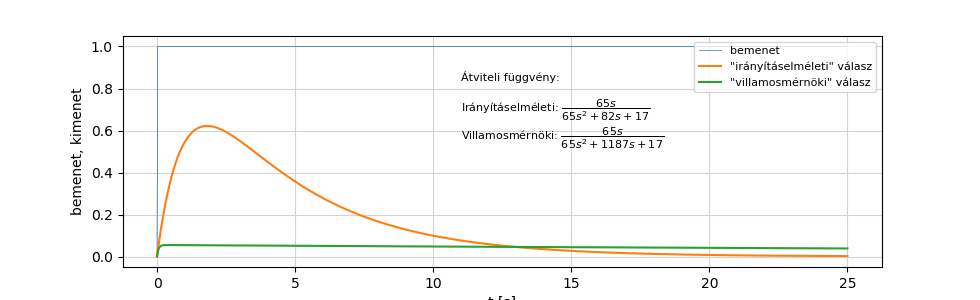

interactive(children=(IntSlider(value=10, description='$R_1$', max=300, min=1), IntSlider(value=10, descriptio…

In [3]:
num_of_samples = 100
total_time = 25
t = np.linspace(0, total_time, num_of_samples*10)# time for which response is calculated (start, stop, step)

# making step function (for plotting)
step_function = np.ones(len(t))
step_function[0]=0

# make figure
fig = plt.figure(figsize=(9.8, 3),num='Terhelési probléma - Időfüggvény')

# add axes
ax = fig.add_subplot(111)
ax.set_xlabel('t [s]')
ax.set_ylabel('bemenet, kimenet')

ax.grid(which='both', axis='both', color='lightgray')


# plot step function and responses (initalisation)
ax.plot(t, step_function, lw=.5, label='bemenet')

resp1, = ax.plot([], [], lw=1.5, label='"irányításelméleti" válasz')
resp2, = ax.plot([], [], lw=1.5, label='"villamosmérnöki" válasz')
ax.legend(loc=1, fontsize=8)

R1=1
L1=1
R2=1
L2=1

eq = ax.text((-ax.get_xlim()[0]+ax.get_xlim()[1])*.4, (-ax.get_ylim()[0]+ax.get_ylim()[1])*.5, '',fontsize=8)
# eq.set_bbox(dict(facecolor='b', alpha=0.07, edgecolor='red'))

plt.show()

def set_input(R1=10, R2=20, L1=20, L2=4):
    # make transfer functions (with scipy)
    control_transfer = signal.TransferFunction([R2*L1, 0], [L1*L2, R2*L1+R1*L2, R1*R2])
    electro_transfer = signal.TransferFunction([R2*L1, 0], [L1*L2, R2*L1+R1*L1+R1*L2, R1*R2])
    # calculate step response (with scipy)
    time1, response1 = signal.step(control_transfer, T=t)
    time2, response2 = signal.step(electro_transfer, T=t)

    # update responses plots
    resp1.set_data(time1, response1)
    resp2.set_data(time2, response2)
    
    plt.show()
    
    #update strings for equations
    niz_gor_con = str(R2*L1) + 's'
    niz_dol_con = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L2) + 's + ' + str(R1*R2)
    niz_gor_ele = str(R2*L1) + 's'
    niz_dol_ele = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L1+R1*L2) + 's + ' + str(R1*R2)
    #update equations
    tekst = 'Átviteli függvény:\n\nIrányításelméleti: $\dfrac{' + niz_gor_con + '}{' + niz_dol_con + '}$\nVillamosmérnöki: $\dfrac{' + niz_gor_ele + '}{' + niz_dol_ele + '}$'
    eq.set_text(tekst)

# make string to show equations
niz_gor_con = str(R2*L1) + 's'
niz_dol_con = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L2) + 's + ' + str(R1*R2)
niz_gor_ele = str(R2*L1) + 's'
niz_dol_ele = str(L1*L2) + 's^2 + ' + str(R2*L1+R1*L1+R1*L2) + 's + ' + str(R1*R2)

interact(set_input, R1=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$R_1$'),
         R2=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$R_2$'),
         L1=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$L_1$'),
         L2=widgets.IntSlider(min=1,max=300,step=1,value=10,description='$L_2$'));
